In [1]:
import torch
import pandas as pd
import h5py
import os
import matplotlib.pyplot as plt
import seaborn as sns
import os.path as osp
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import math
from random import sample


import networkx as nx
import csrgraph as cg
import os
import itertools
import json
import operator
import swifter
from tqdm import tqdm
import time

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
DATA_DIR = "/n/data1/hms/dbmi/zitnik/lab/users/ish520/Causal-PPI/data/rep-learning-approach-3-all-genes"

# Genetic Perturbations

## Backward

In [12]:
data_back_MCF7 = torch.load (DATA_DIR+"/processed/real_lognorm/data_backward_MCF7.pt")
data_back_A549 = torch.load (DATA_DIR+"/processed/real_lognorm/data_backward_A549.pt")

edges_MCF7 = torch.load (DATA_DIR+"/processed/real_lognorm/edge_index_MCF7.pt")
edges_A549 = torch.load (DATA_DIR+"/processed/real_lognorm/edge_index_A549.pt")

In [13]:
MCF7_back_treated =[]
MCF7_back_diseased = []
for x in data_back_MCF7: 
    MCF7_back_treated.append(tuple(x.treated.tolist()))
    MCF7_back_diseased.append(tuple(x.diseased.tolist()))

In [14]:
A549_back_treated =[]
A549_back_diseased = []
for x in data_back_A549: 
    A549_back_treated.append(tuple(x.treated.tolist()))
    A549_back_diseased.append(tuple(x.diseased.tolist()))

In [46]:
num_unique_MCF7_backdiseased, num_unique_MCF7_backtreated= len(set(MCF7_back_diseased)), len(set(MCF7_back_treated))
print("Number of unique treated samples in MCF7 set: {MCF7backtreated}\nNumber of unique diseased samples in MCF7 set: {MCF7backdiseased}".format(MCF7backtreated=num_unique_MCF7_backtreated, MCF7backdiseased=num_unique_MCF7_backdiseased))

Number of unique treated samples in MCF7 set: 18774
Number of unique diseased samples in MCF7 set: 4852


In [48]:
num_unique_A549_backdiseased, num_unique_A549_backtreated= len(set(A549_back_diseased)), len(set(A549_back_treated))
print("Number of unique treated samples in A549 set: {A549backtreated}\nNumber of unique diseased samples in A549 set: {A549backdiseased}".format(A549backtreated=num_unique_A549_backtreated, A549backdiseased=num_unique_A549_backdiseased))

Number of unique treated samples in A549 set: 24255
Number of unique diseased samples in A549 set: 4327


## Forward

In [26]:
data_forward_MCF7 = torch.load (DATA_DIR+"/processed/real_lognorm/data_forward_MCF7.pt")
data_forward_A549 = torch.load (DATA_DIR+"/processed/real_lognorm/data_forward_A549.pt")

In [27]:
MCF7_forward_healthy =[]
MCF7_forward_diseased = []
for x in data_forward_MCF7: 
    MCF7_forward_healthy.append(tuple(x.healthy.tolist()))
    MCF7_forward_diseased.append(tuple(x.diseased.tolist()))

In [28]:
A549_forward_healthy =[]
A549_forward_diseased = []
for x in data_forward_A549: 
    A549_forward_healthy.append(tuple(x.healthy.tolist()))
    A549_forward_diseased.append(tuple(x.diseased.tolist()))

In [57]:
num_unique_MCF7_forwarddiseased, num_unique_MCF7_forwardhealthy= len(set(MCF7_forward_diseased)), len(set(MCF7_forward_healthy))
print("Number of unique healthy samples in MCF7 set: {MCF7forwardhealthy}\nNumber of unique diseased samples in MCF7 set: {MCF7forwarddiseased}".format(MCF7forwardhealthy=num_unique_MCF7_forwardhealthy, MCF7forwarddiseased=num_unique_MCF7_forwarddiseased))

Number of unique healthy samples in MCF7 set: 113
Number of unique diseased samples in MCF7 set: 4852


In [60]:
num_unique_A549_forwarddiseased, num_unique_A549_forwardhealthy= len(set(A549_forward_diseased)), len(set(A549_forward_healthy))
print("Number of unique healthy samples in A549 set: {A549forwardhealthy}\nNumber of unique diseased samples in A549 set: {A549forwarddiseased}".format(A549forwardhealthy=num_unique_A549_forwardhealthy, A549forwarddiseased=num_unique_A549_forwarddiseased))

Number of unique healthy samples in A549 set: 50
Number of unique diseased samples in A549 set: 4327


## Distributions

In [15]:
lol_MCF7_back_treated =[]
lol_MCF7_back_diseased = []
for x in data_back_MCF7: 
    lol_MCF7_back_treated.append(x.treated.tolist())
    lol_MCF7_back_diseased.append(x.diseased.tolist())

In [29]:
lol_MCF7_forward_healthy =[]
for x in data_forward_MCF7: 
    lol_MCF7_forward_healthy.append(x.healthy.tolist())

In [16]:
lol_A549_back_treated =[]
lol_A549_back_diseased = []
for x in data_back_A549: 
    lol_A549_back_treated.append(x.treated.tolist())
    lol_A549_back_diseased.append(x.diseased.tolist())

In [30]:
lol_A549_forward_healthy =[]
for x in data_forward_A549: 
    lol_A549_forward_healthy.append(x.healthy.tolist())

### MCF7 - Treated

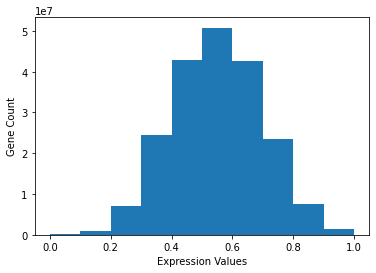

In [18]:
flat_list = [item for sublist in lol_MCF7_back_treated for item in sublist]
plt.hist(flat_list)
plt.xlabel('Expression Values')
plt.ylabel('Gene Count')
plt.show()

### MCF7 - Diseased

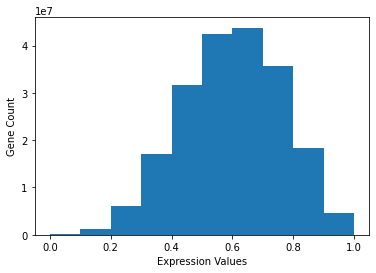

In [19]:
flat_list = [item for sublist in lol_MCF7_back_diseased for item in sublist]
plt.hist(flat_list)
plt.xlabel('Expression Values')
plt.ylabel('Gene Count')
plt.show()

### MCF7 - Healthy

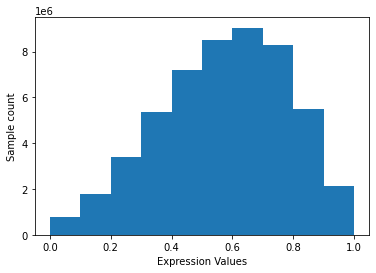

In [31]:
flat_list = [item for sublist in lol_MCF7_forward_healthy for item in sublist]
plt.hist(flat_list)
plt.xlabel('Expression Values')
plt.ylabel('Sample count')
plt.show()

### A549 - Treated

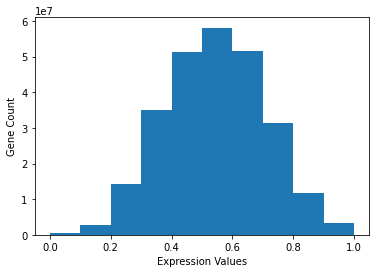

In [20]:
flat_list = [item for sublist in lol_A549_back_treated for item in sublist]
plt.hist(flat_list)
plt.xlabel('Expression Values')
plt.ylabel('Gene Count')
plt.show()

### A549 - Diseased

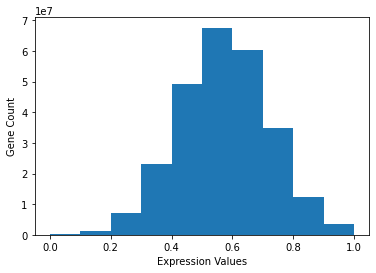

In [21]:
flat_list = [item for sublist in lol_A549_back_diseased for item in sublist]
plt.hist(flat_list)
plt.xlabel('Expression Values')
plt.ylabel('Gene Count')
plt.show()

### A549 - Healthy

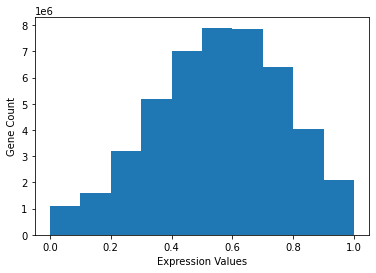

In [33]:
flat_list = [item for sublist in lol_A549_forward_healthy for item in sublist]
plt.hist(flat_list)
plt.xlabel('Expression Values')
plt.ylabel('Gene Count')
plt.show()

# Chemical Perturbations

## Backward

In [3]:
data_back_MCF7 = torch.load (DATA_DIR+"/processed/chemical/real_lognorm/data_backward_MCF7.pt")
data_back_A549 = torch.load (DATA_DIR+"/processed/chemical/real_lognorm/data_backward_A549.pt")

edges_MCF7 = torch.load (DATA_DIR+"/processed/chemical/real_lognorm/edge_index_MCF7.pt")
edges_A549 = torch.load (DATA_DIR+"/processed/chemical/real_lognorm/edge_index_A549.pt")

In [ ]:
MCF7_back_treated =[]
MCF7_back_diseased = []
for x in data_back_MCF7: 
    MCF7_back_treated.append(tuple(x.treated.tolist()))
    MCF7_back_diseased.append(tuple(x.diseased.tolist()))

In [4]:
A549_back_treated =[]
A549_back_diseased = []
for x in data_back_A549: 
    A549_back_treated.append(tuple(x.treated.tolist()))
    A549_back_diseased.append(tuple(x.diseased.tolist()))

In [67]:
num_unique_MCF7_backdiseased, num_unique_MCF7_backtreated= len(set(MCF7_back_diseased)), len(set(MCF7_back_treated))
print("Number of unique treated samples in MCF7 set: {MCF7backtreated}\nNumber of unique diseased samples in MCF7 set: {MCF7backdiseased}".format(MCF7backtreated=num_unique_MCF7_backtreated, MCF7backdiseased=num_unique_MCF7_backdiseased))

Number of unique treated samples in MCF7 set: 35421
Number of unique diseased samples in MCF7 set: 7336


In [68]:
num_unique_A549_backdiseased, num_unique_A549_backtreated= len(set(A549_back_diseased)), len(set(A549_back_treated))
print("Number of unique treated samples in A549 set: {A549backtreated}\nNumber of unique diseased samples in A549 set: {A549backdiseased}".format(A549backtreated=num_unique_A549_backtreated, A549backdiseased=num_unique_A549_backdiseased))

Number of unique treated samples in A549 set: 23100
Number of unique diseased samples in A549 set: 5261


## Forward

In [8]:
data_forward_MCF7 = torch.load (DATA_DIR+"/processed/chemical/real_lognorm/data_forward_MCF7.pt")
data_forward_A549 = torch.load (DATA_DIR+"/processed/chemical/real_lognorm/data_forward_A549.pt")

In [71]:
MCF7_forward_healthy =[]
MCF7_forward_diseased = []
for x in data_forward_MCF7: 
    MCF7_forward_healthy.append(tuple(x.healthy.tolist()))
    MCF7_forward_diseased.append(tuple(x.diseased.tolist()))

In [9]:
A549_forward_healthy =[]
A549_forward_diseased = []
for x in data_forward_A549: 
    A549_forward_healthy.append(tuple(x.healthy.tolist()))
    A549_forward_diseased.append(tuple(x.diseased.tolist()))

In [73]:
num_unique_MCF7_forwarddiseased, num_unique_MCF7_forwardhealthy= len(set(MCF7_forward_diseased)), len(set(MCF7_forward_healthy))
print("Number of unique healthy samples in MCF7 set: {MCF7forwardhealthy}\nNumber of unique diseased samples in MCF7 set: {MCF7forwarddiseased}".format(MCF7forwardhealthy=num_unique_MCF7_forwardhealthy, MCF7forwarddiseased=num_unique_MCF7_forwarddiseased))

Number of unique healthy samples in MCF7 set: 2675
Number of unique diseased samples in MCF7 set: 7336


In [74]:
num_unique_A549_forwarddiseased, num_unique_A549_forwardhealthy= len(set(A549_forward_diseased)), len(set(A549_forward_healthy))
print("Number of unique healthy samples in A549 set: {A549forwardhealthy}\nNumber of unique diseased samples in A549 set: {A549forwarddiseased}".format(A549forwardhealthy=num_unique_A549_forwardhealthy, A549forwarddiseased=num_unique_A549_forwarddiseased))

Number of unique healthy samples in A549 set: 50
Number of unique diseased samples in A549 set: 5261


## Distributions

In [4]:
lol_MCF7_back_treated =[]
lol_MCF7_back_diseased = []
for x in data_back_MCF7: 
    lol_MCF7_back_treated.append(x.treated.tolist())
    lol_MCF7_back_diseased.append(x.diseased.tolist())

In [12]:
lol_MCF7_forward_healthy =[]
for x in data_forward_MCF7: 
    lol_MCF7_forward_healthy.append(x.healthy.tolist())

In [5]:
lol_A549_back_treated =[]
lol_A549_back_diseased = []
for x in data_back_A549: 
    lol_A549_back_treated.append(x.treated.tolist())
    lol_A549_back_diseased.append(x.diseased.tolist())

In [10]:
lol_A549_forward_healthy =[]
for x in data_forward_A549: 
    lol_A549_forward_healthy.append(x.healthy.tolist())

### MCF7-Treated

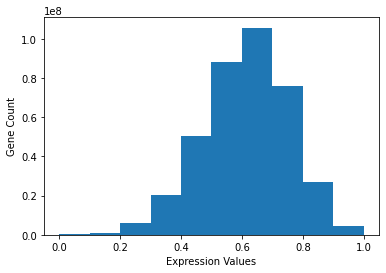

In [5]:
flat_list = [item for sublist in lol_MCF7_back_treated for item in sublist]
plt.hist(flat_list)
plt.xlabel('Expression Values')
plt.ylabel('Gene Count')
plt.show()

### MCF7-Diseased

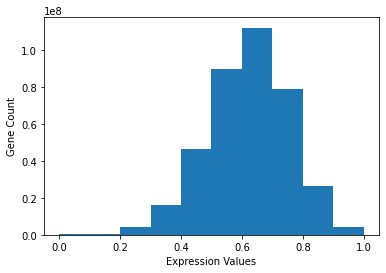

In [6]:
flat_list = [item for sublist in lol_MCF7_back_diseased for item in sublist]
plt.hist(flat_list)
plt.xlabel('Expression Values')
plt.ylabel('Gene Count')
plt.show()

### MCF7-Healthy

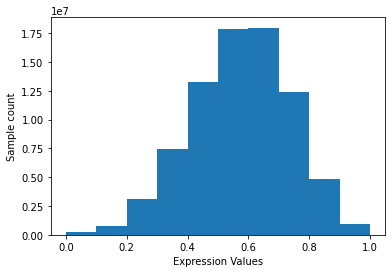

In [14]:
flat_list = [item for sublist in lol_MCF7_forward_healthy for item in sublist]
plt.hist(flat_list)
plt.xlabel('Expression Values')
plt.ylabel('Sample count')
plt.show()

### A549 - Treated

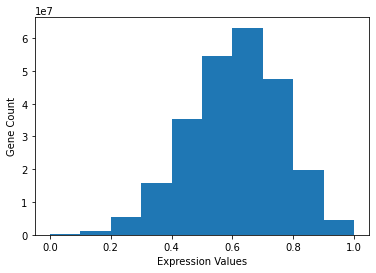

In [20]:
flat_list = [item for sublist in lol_A549_back_treated for item in sublist]
plt.hist(flat_list)
plt.xlabel('Expression Values')
plt.ylabel('Gene Count')
plt.show()

### A549 - Diseased

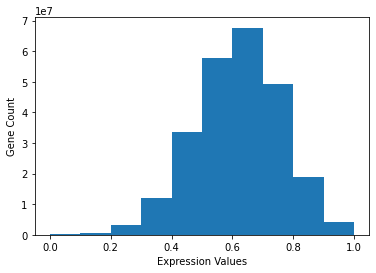

In [7]:
flat_list = [item for sublist in lol_A549_back_diseased for item in sublist]
plt.hist(flat_list)
plt.xlabel('Expression Values')
plt.ylabel('Gene Count')
plt.show()

### A549 - Healthy

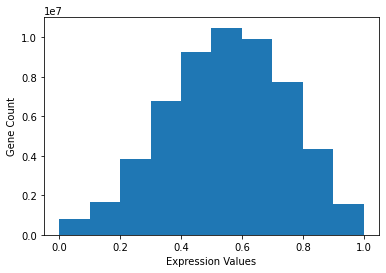

In [11]:
flat_list = [item for sublist in lol_A549_forward_healthy for item in sublist]
plt.hist(flat_list)
plt.xlabel('Expression Values')
plt.ylabel('Gene Count')
plt.show()